# Bigrams

An the EDA notebook we looked at word frequency, but did not look at words appearing together in bigrams. Here we explore that feature of the data more deeply.

In [1]:
from functions import *

with open('dict.pkl', 'rb') as f:
    text_dict = pickle.load(f)

Crucial here is what words we count as stopwords. Many of the logical connectors we have removed, since they would not reveal anything particularly interesting. 

In [2]:
stopwords_list = stopwords.words('english') + list(string.punctuation) + ['“','”','...',"''",'’','``', "'", "‘"]
custom_stopwords = ['–', 'also', 'something', 'cf', 'thus', 'two', 'now', 'would', 'make', 'eb', 'u', 'well', 'even', 'said', 'eg', 'us',
                    'n', 'sein', 'e', 'da', 'therefore', 'however', 'merely', 'way', 'since', 'latter', 'first',
                    'B', 'mean', 'upon', 'yet', 'cannot', 'c', 'C', 'let', "'s", 'b', 'ofthe', '_', '-', 'eg', 'e.g.',
                    'ie', 'i.e.', 'f', 'l', "n't", 'e.g', 'i.e', '—', '--', 'hyl', 'phil', 'v', 'press']
stopwords_list += custom_stopwords

First we prepare a set of bigrams for the entire corpus.

In [3]:
# collect all the texts together
all_texts = ''
for school in text_dict.keys():
    all_texts += text_dict[school]

len(all_texts)

47346028

In [4]:
#quickly remove some artifacts
all_texts = all_texts.replace('signi cance', 'significance').replace('obj ects', 'objects').replace('de nite', 'denote').replace('j ust', 'just')
for school in text_dict.keys():
    text_dict[school] = text_dict[school].replace('signi cance', 'significance').replace('obj ects', 'objects').replace('de nite', 'denote').replace('j ust', 'just')


In [5]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
all_tokens = nltk.regexp_tokenize(all_texts, pattern)


In [6]:
all_tokens_stopped = [x.lower() for x in all_tokens if x.lower() not in stopwords_list]

In [7]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

bigram_measures = BigramAssocMeasures()

In [8]:
all_bigram_finder = BigramCollocationFinder.from_words(all_tokens_stopped)
bigrams_scored = all_bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [9]:
all_dict = dict(bigrams_scored[:10])
hos = list(all_dict.keys())

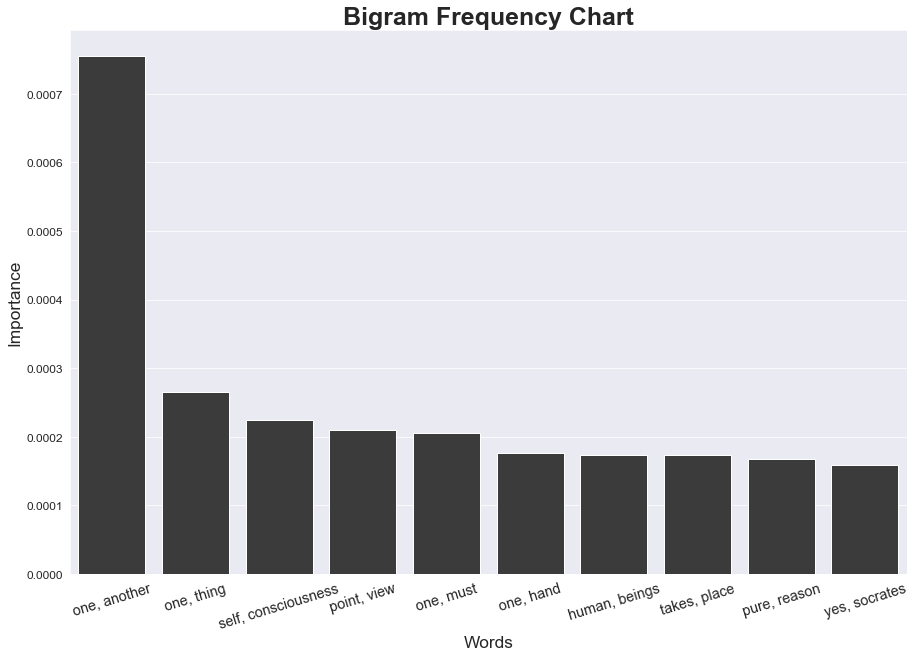

In [10]:
bigram_df = pd.DataFrame(bigrams_scored[:10], columns=['bigram', 'score'])
bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ', '.join(x))

sns.set_style('darkgrid')
fig = plt.subplots(figsize=(15, 10))
sns.barplot(data=bigram_df, x='bigram', y='score', color='#3B3B3B')
plt.title('Bigram Frequency Chart', size=25, fontweight='bold')
plt.xlabel('Words', size='xx-large')
plt.xticks(rotation=17, size='x-large')
plt.ylabel('Importance', size='xx-large')
plt.yticks(size='large')
plt.show()

While this isn't particularly informative, it does show us some common phrases used throughout the history of philosophy. It also helps us to understand why 'one' was such a common term - it is used in some transition phrases like or to denote other people. Note that because 'or' and other logical connectives are stopwords, the bigram 'one, another' indicates a number of different phrases ('one or another', 'one another', 'one and another'). 

Next we can create similar charts for each school to see which schools use which phrases preferentially.

In [53]:
bigram_dict = {}
for school in text_dict.keys():
    tokens = nltk.regexp_tokenize(text_dict[school], pattern)
    tokens_stopped = [x.lower() for x in tokens if x.lower() not in stopwords_list]
    measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens_stopped)
    scored = finder.score_ngrams(measures.raw_freq)
    bigram_dict[school] = scored


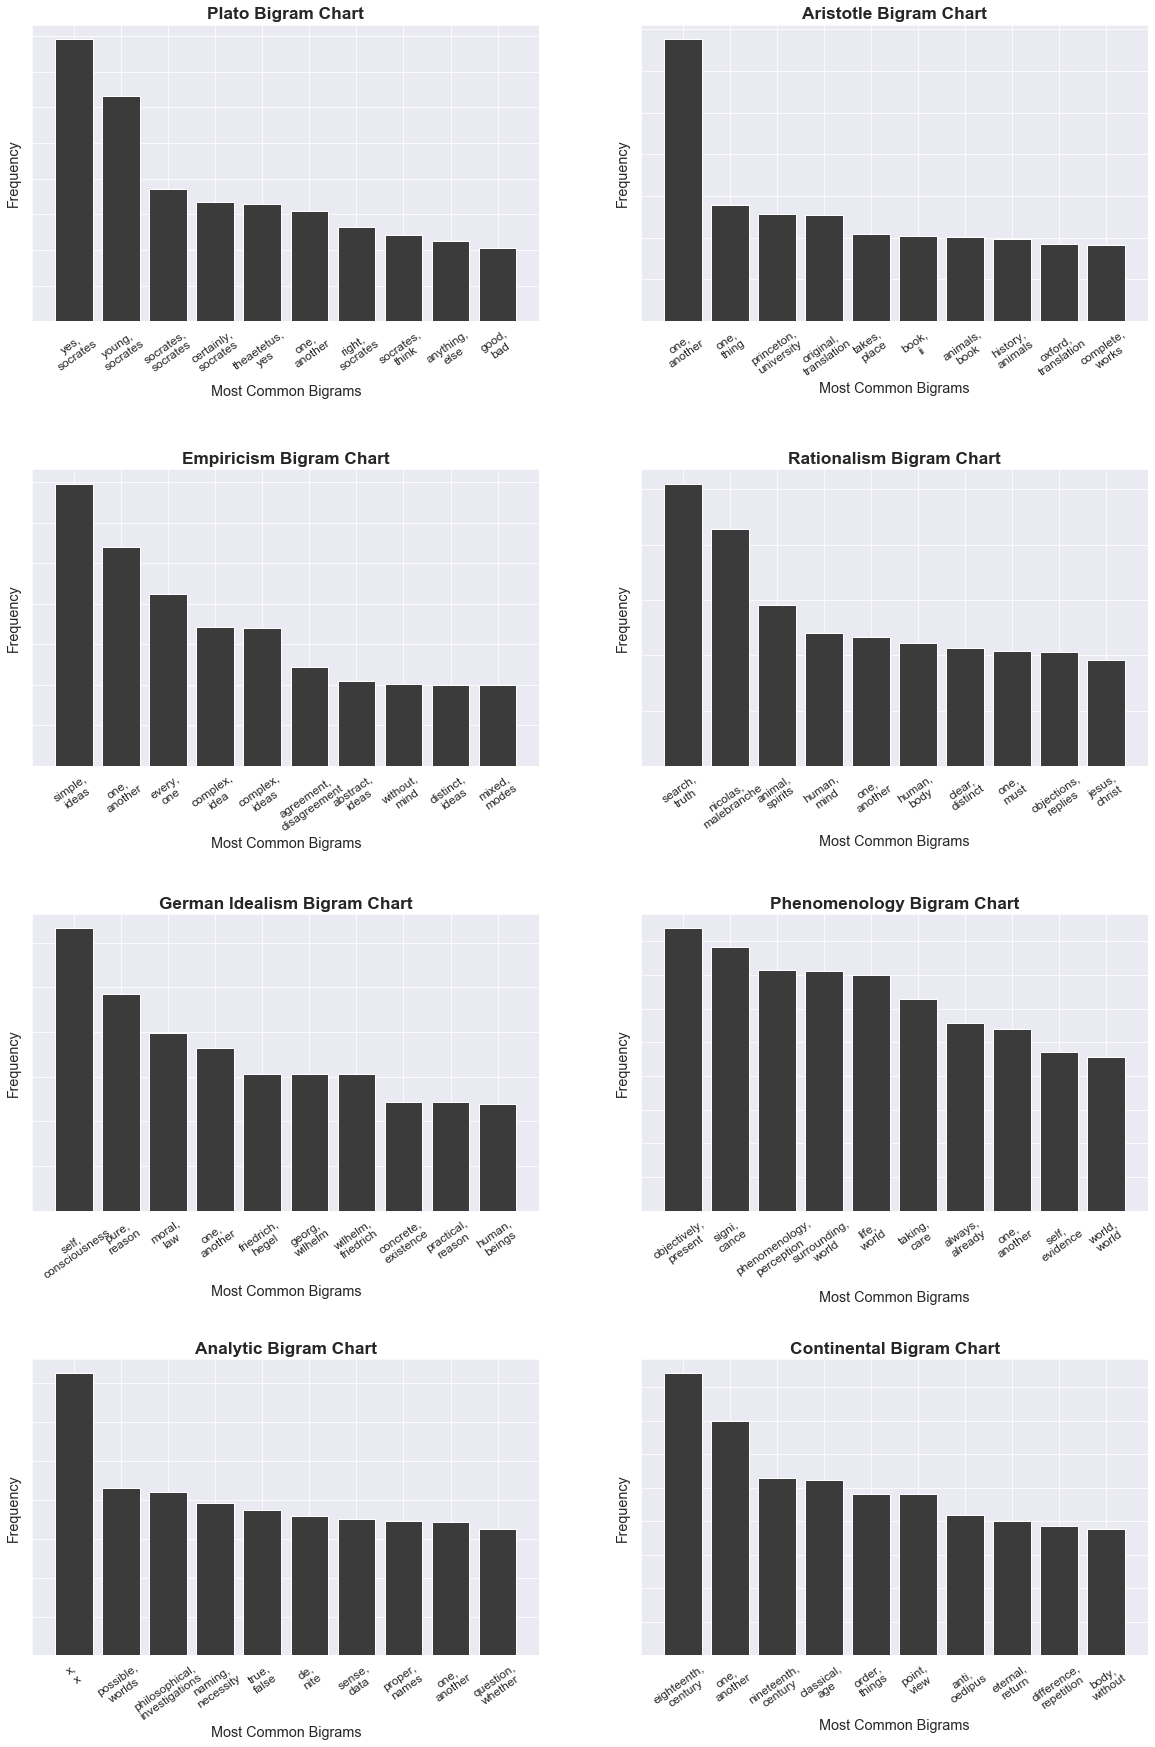

In [77]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20, 30)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for school, ax in zip(bigram_dict.keys(), axs.flatten()):
    labels = [',\n'.join(x[0]) for x in bigram_dict[school][:10]]
    heights = [x[1] for x in bigram_dict[school][:10]]
    ax.bar(x=labels, height=heights, color='#3B3B3B')
    xlabels = labels
    ax.set_xticklabels(xlabels, rotation=35, size='large')
    ax.set_yticklabels(ax.get_yticklabels(), size='large')
    ax.set_xlabel('Most Common Bigrams', size='x-large')
    ax.set_ylabel('Frequency', size='x-large')
    ax.set_title(school.replace('_', ' ').title() + ' Bigram Chart', size='xx-large', fontweight='bold')
plt.show()

From this printout one can tell that certain artifacts of transforming pdfs to txt files have remained. One sees phrases that must be headings of pages (like the title of Malebranche's book *Search After Truth* or 'oxford', the translators of Aristotle's texts). The next cells aim to correct for this by eliminating specific stopwords for each school.

In [11]:
plato_stopwords = ['socrates', 'theaetetus', 'alcibiades', 'yes', 'clinias']
aristotle_stopwords = ['princeton', 'translation', 'ii', 'book', 'oxford', 'works', 'aristotle']
empiricism_stopwords = []
rationalism_stopwords = ['nicolas', 'replies', 'search', 'q', 'prop']
german_idealism_stopwords = ['elements', 'wilhelm', 'friedrich', 'georg', 'press']
phenomenology_stopwords = ['perception', 'signi']
analytic_stopwords = ['investigations', 'naming', 'x', 'nite']
continental_stopwords = ['seventeenth', 'eighteenth', 'nineteenth', 'classical', 'things', 'anti', 'difference', 'organs']

stopwords_dict = {'plato': plato_stopwords, 'aristotle': aristotle_stopwords, 'rationalism': rationalism_stopwords, 
                    'empiricism': empiricism_stopwords, 'german_idealism': german_idealism_stopwords, 'analytic': analytic_stopwords, 
                    'continental': continental_stopwords, 'phenomenology': phenomenology_stopwords}

In [12]:
bigram_dict_cleaned = {}
for school in text_dict.keys():
    tokens = nltk.regexp_tokenize(text_dict[school], pattern)
    tokens_stopped = [x.lower() for x in tokens if x.lower() not in (stopwords_list + stopwords_dict[school])]
    measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens_stopped)
    scored = finder.score_ngrams(measures.raw_freq)
    bigram_dict_cleaned[school] = scored

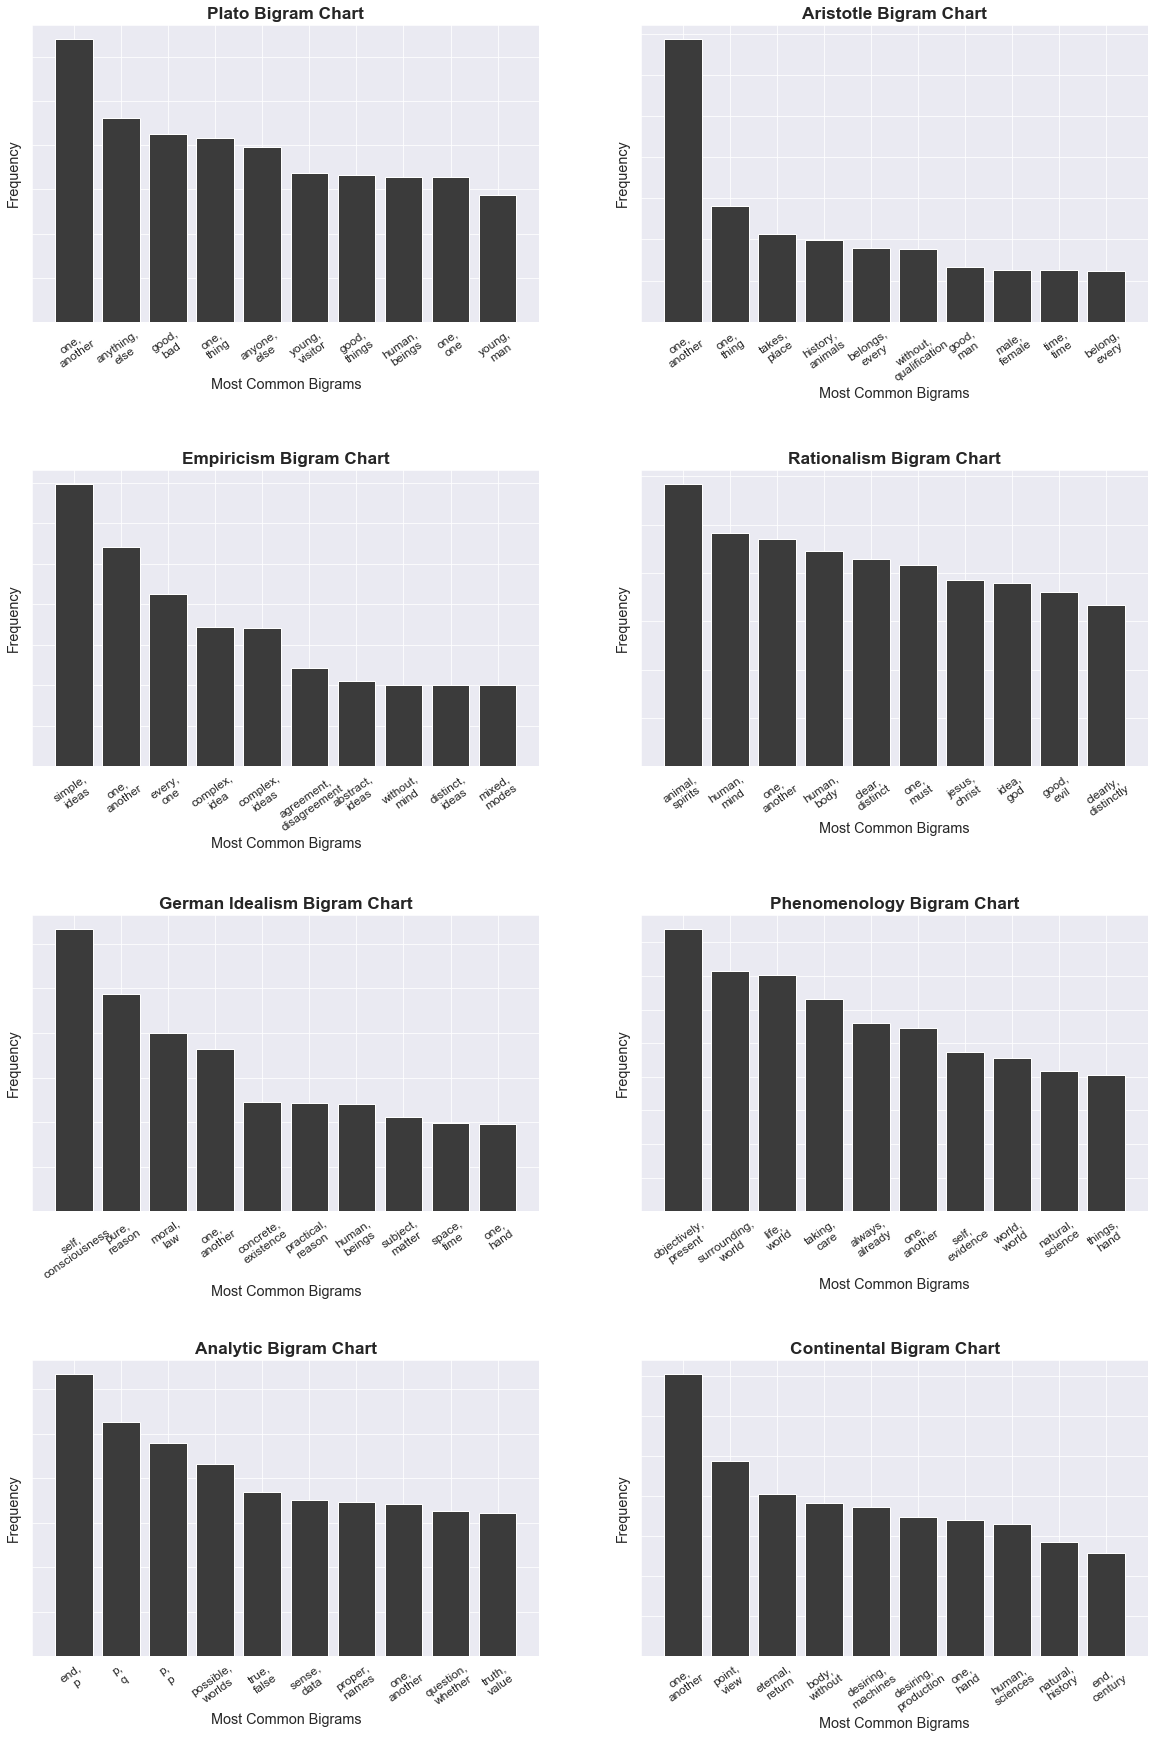

In [13]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20, 30)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for school, ax in zip(bigram_dict_cleaned.keys(), axs.flatten()):
    labels = [',\n'.join(x[0]) for x in bigram_dict_cleaned[school][:10]]
    heights = [x[1] for x in bigram_dict_cleaned[school][:10]]
    ax.bar(x=labels, height=heights, color='#3B3B3B')
    xlabels = labels
    ax.set_xticklabels(xlabels, rotation=35, size='large')
    ax.set_yticklabels(ax.get_yticklabels(), size='large')
    ax.set_xlabel('Most Common Bigrams', size='x-large')
    ax.set_ylabel('Frequency', size='x-large')
    ax.set_title(school.replace('_', ' ').title() + ' Bigram Chart', size='xx-large', fontweight='bold')
plt.show()

Not bad! These bigrams actually give a solid sense of the key concepts of some of the schools. Rationalism's emphasis on 'clear and distinct ideas' and empiricism's focus on 'simple and complex ideas' are so forceful that both singular and plural versions of the phrases show up. Heidegger's common phrase 'always already' finds itself on the Phenomenology bigram list, and the German Idealist's continual discussion of self-consciousness is also evident. Aristotle and Plato's bigrams are harder to interpret, with Plato's being mostly common locutions from the dialogues rather than anything philosophically significant.

These could be explored further; perhaps it might be worthwhile to see what happens if we do some lemmatization. Still, this is a good start for now.

With these presented, we move on to examine word embeddings.

# Word 2 Vec Embeddings

To begin with we have to load our data and tokenize it.

In [14]:
from tensorflow.random import set_seed
set_seed(17)

import numpy as np 
np.random.seed(17)


In [15]:
with open('data.pkl', 'rb') as f:
    text_df = pickle.load(f)

text_df.sample(5)

,school,sentences
9931,plato,but he also considers weaknesses in hisown arg...
15486,phenomenology,this structural factor of care tells us unambi...
38375,analytic,to make any sense of thepassage it must refer...
23284,aristotle,further he who moves circularobjects moves th...
36290,analytic,nozick seems to thinkthat a counterfactual wit...


In [16]:
w2v_data = text_df['sentences'].map(word_tokenize)

In [17]:
w2v_data.sample(10)

25337    [norcan, one, say, in, this, regard, that, so,...
27759    [perceiving, this, identity, and, givinguttera...
17360    [we, can, seeclearly, provided, that, what, i,...
19115    [just, such, another, organ, is, foundalso, in...
13824    [but, then, we, differ, as, tothe, kind, of, t...
29571    [and, with, the, universal, and, thegenus, the...
5855     [one, thing, which, might, probably, give, an,...
11179    [it, thus, becomes, possible, to, establish, t...
9845     [it, is, clear, that, these, very, general, se...
11834    [he, fears, his, strength, is, insufficient, s...
Name: sentences, dtype: object

We see here a couple problems. First, some words appear to be fused together, probably because the transformation from pdf to txt did not register the space properly. Second, the sentences include words that are non-words like 'ct', 'v', or '"'. The former is hard to fix and we will just make do here, but the latter can be corrected for with some cleaning.

In [18]:
w2v_stopwords = ['"', 'ct', 'v', '”', 'co', "'", 'ff', 'ed', 'zu', 's', '’', 'ce', 'ff', 'der', 'nt', 'au', 'ality', 'ore',
                'ra', 'bee', 'usc', 'ts', 'ib', 'ad', 'n', 'vp', 'lt', 'st', 'ia', 'gen', 'ective', 'und', 'hoc', 'theb', 'rt',
                'fu', 'fl', 'bk', 'xxvi', 'xx', 'ﬀ', 'del', 'vo', 'bf', 'ul', 'e', 'g', 'oc', 'hy']
cleaned_w2v_data = []
for sentence in list(w2v_data):
    cleaned_sentence = [x.lower() for x in sentence if x.lower() not in w2v_stopwords]
    cleaned_w2v_data.append(cleaned_sentence)

In [21]:
model = Word2Vec(list(cleaned_w2v_data), size=700, window=5, min_count=15, workers=-1)

model.train(cleaned_w2v_data, total_examples=model.corpus_count, epochs=20)

wv = model.wv

In [22]:
# let's try it out!
wv.most_similar('philosophy')

[('greeks', 0.14179526269435883),
 ('maintenance', 0.14031952619552612),
 ('solubility', 0.12914758920669556),
 ('theabstract', 0.12671200931072235),
 ('restitution', 0.12531207501888275),
 ('samemanner', 0.12318208813667297),
 ('spectators', 0.12135472893714905),
 ('wealthiest', 0.11961044371128082),
 ('theaetetus', 0.11943365633487701),
 ('auxiliaries', 0.11931920796632767)]

Despite many attempts at tuning the parameters, it was hard to get any results that seemed more than vaguely sensible when we dealt with the whole corpus. It was rare for a vector to have more than .2 similarity with another word. Here the it's possible to get that philosophy is related to the greeks and is abstract, but the other terms don't make as much sense. Does philosophy make you the wealthiest? Not in my experience.

Reasoning that the low similarity scores and general nonsensicality might be due to the fact that different philosophers represent such different opinions, we narrowed our focus on to a single school of thought.

In [18]:
gi_wv = make_w2v(text_df.loc[text_df['school'] == 'german_idealism']['sentences'], stopwords=w2v_stopwords)

In [19]:
gi_wv.most_similar('concept')

[('inherent', 0.2776477038860321),
 ('asthis', 0.27747344970703125),
 ('needed', 0.24902299046516418),
 ('cost', 0.2465524673461914),
 ('alternating', 0.2385777086019516),
 ('fulfilment', 0.23607274889945984),
 ('theformal', 0.23310530185699463),
 ('aestheticjudgement', 0.23140883445739746),
 ('invariably', 0.21800771355628967),
 ('gained', 0.21729588508605957)]

This is a little more sensible. We explore the corpus a bit and tend to get scores in the mid .2 to .3 range. For each word some thing make some sense. One can speak of the concept inherent in a thing, for example, and Kant and Hegel both talk about formal concepts at length, for example.

In [22]:
gi_wv.most_similar(negative=['intuition'])

[('ethical', 0.25762102007865906),
 ('statues', 0.2567233443260193),
 ('sometimes', 0.25241243839263916),
 ('emendation', 0.2454911172389984),
 ('smaller', 0.2391013354063034),
 ('concreto', 0.23803603649139404),
 ('multiplicity', 0.23771025240421295),
 ('pureunderstanding', 0.23597465455532074),
 ('whereit', 0.23454852402210236),
 ('itsappearance', 0.2263149619102478)]

This is another reasonable example. Intuitions are the opposite of ethical (ethics is a matter of pure reason and has nothing to do with intuition for those in this school) and could never be found in the pure understanding.

Still here it is possible that the noise in our data and the differences between the philosophers is making it hard to map exactly how they use the words. Although a school of philosophy does represent a general orientation of thinking toward a subject and a shared set of background assumptions, the thinkers in the school tend to focus on disagreements among themselves and often use differing terminology. So it makes sense that a single school might be too large a unit to work on if we want to map the meanings of terms clearly.

Let's look at a school whose texts come entirely from the Project Gutenberg corpus to see if minimizing the pdf transformation artifacts is helpful.

In [23]:
empiricism_wv = make_w2v(text_df.loc[text_df['school']=='empiricism']['sentences'], stopwords=w2v_stopwords)

In [32]:
empiricism_wv.most_similar('object')

[('subjectof', 0.2967976927757263),
 ('justly', 0.2521345019340515),
 ('improvement', 0.248275488615036),
 ('gave', 0.24493661522865295),
 ('thepassions', 0.22917671501636505),
 ('bonds', 0.22820337116718292),
 ('scenes', 0.22591933608055115),
 ('propagation', 0.21742674708366394),
 ('conversation', 0.21458300948143005),
 ('fathers', 0.2137090563774109)]

In [30]:
empiricism_wv.most_similar('knowledge')

[('informing', 0.250565767288208),
 ('originally', 0.2368488311767578),
 ('imay', 0.2355400025844574),
 ('got', 0.22767753899097443),
 ('thetransition', 0.2231016457080841),
 ('innumerable', 0.22021621465682983),
 ('withourselves', 0.2162882685661316),
 ('makes', 0.21442332863807678),
 ('brought', 0.21367257833480835),
 ('habits', 0.21289992332458496)]

In [26]:
empiricism_wv.most_similar(negative=['sensation'])

[('innate', 0.31094059348106384),
 ('dial', 0.2740311920642853),
 ('deceitful', 0.2554841637611389),
 ('ingredient', 0.24599139392375946),
 ('strongest', 0.24514873325824738),
 ('thefirst', 0.24171310663223267),
 ('attributed', 0.23380252718925476),
 ('presents', 0.23011191189289093),
 ('heavy', 0.21950966119766235),
 ('ship', 0.21924157440662384)]

The results here are more or less similar to those we had with German Idealism. Some reasonable responses can be found - one often speaks of the 'object of the passions', the knowledge is definitely informative, and the issue of whether sensation was innate was a hot topic for this school of philosophy. But there are also plenty of oddities: why would 'fathers' be similar to 'object'? It's also worth noting that there were still several odd textual fusions here, so the issue must not be isolated to pdf transformations alone.

By building these models for individual schools, we can see how each school uses terms differently. 

In [33]:
rationalism_wv = make_w2v(text_df.loc[text_df['school']=='rationalism']['sentences'], stopwords=w2v_stopwords)
aristotle_wv = make_w2v(text_df.loc[text_df['school']=='aristotle']['sentences'], stopwords=w2v_stopwords)
analytic_wv = make_w2v(text_df.loc[text_df['school']=='analytic']['sentences'], stopwords=w2v_stopwords)

In [34]:
print('GOD ACCORDING TO ARISTOTLE\n')
print(pd.DataFrame(list(aristotle_wv.most_similar('god')[:5])))

print('\n\nGOD ACCORDING TO RATIONALISM\n')
print(pd.DataFrame(rationalism_wv.most_similar('god')[:5]))

print('\n\nGOD ACCORDING TO ANALYTIC PHILOSPHY\n')
print(pd.DataFrame(list(analytic_wv.most_similar('god')[:5])))

GOD ACCORDING TO RATIONALISM

               0         1
0     isextended  0.263054
1  indispensable  0.251177
2             if  0.245974
3          chief  0.240289
4          ifthe  0.234554


GOD ACCORDING TO ARISTOTLE

               0         1
0       thelower  0.261356
1  indispensable  0.251177
2             if  0.245974
3          chief  0.240289
4        archons  0.237566


GOD ACCORDING TO ANALYTIC PHILOSPHY

               0         1
0   rationalists  0.259936
1     issupposed  0.258261
2  indispensable  0.251177
3             tw  0.246304
4             if  0.245974


Here we see the differnet conceptions of God from three schools of thought. Aristotle represents an ancient view, Rationalism a more modern view that was at time self-consciously taking its lead from Aristotle, and Analytic philosophy a much more moden view colored by contemporary scientific theories. Yet all commonly describe God as indespensable. They also agree that God raises many questions, as evidenced by the 'if.' It's also interesting to note that the rationalist focus on God is bourne out by analytic philosophy placing 'rationalists' as similar to 'god.' 

Let's repeat the same exercise, taking rationalism, empiricism, and german idealism - three schools that famously differ in their theories of representation.

In [41]:
print('REPRESENTATION ACCORDING TO RATIONALISM\n')
print(pd.DataFrame(rationalism_wv.most_similar('representation')[:5]))

print('\n\nREPRESENTATION ACCORDING TO EMPIRICISM\n')
print(pd.DataFrame(list(empiricism_wv.most_similar('representation')[:5])))

print('\n\nREPRESENTATION ACCORDING TO GERMAN IDEALISM\n')
print(pd.DataFrame(list(gi_wv.most_similar('representation')[:5])))

REPRESENTATION ACCORDING TO RATIONALISM

            0         1
0   doctrines  0.249214
1        fell  0.243059
2  adifferent  0.239751
3       focus  0.237176
4       brain  0.236367


REPRESENTATION ACCORDING TO EMPIRICISM

             0         1
0    doctrines  0.249214
1         fell  0.243059
2  tenthousand  0.236660
3        brain  0.236367
4          big  0.223436


REPRESENTATION ACCORDING TO GERMAN IDEALISM

                0         1
0  selfsubsisting  0.266068
1       doctrines  0.249214
2       processof  0.243452
3    simultaneity  0.243143
4            fell  0.243059


This is a bit harder to interpet, but it's interesting that the two earlier schools of thought placed greater emphasis on the role of the brain in representation, while the idealists did not. This makes sense - Kant almost never talks about actual physical mechanisms of perception, for example. 

## Summary & Future Work

I won't bore the reader with more extensive exploration of similarities and differences, though it could be interesting. Unfortunately, because many of the similarity scores were still quite low, it's hard to draw any definitive conclusions from the data. In future work, especially with neural networks, this could be revisited once the similarity scores are high enough to represent genuine trends in the data. To facilitate this we have three primary suggestions:
- clean the data so that word fusions and particles are not as common
- focus on individual schools, but perhaps also individual thinkers.
- gather more data overall; we were working with a few books for each philosopher, but we could have found a dozen books for almost any of them.